In [20]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import axes_grid1

In [3]:
iris = load_iris()
X,y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scalar = StandardScaler()
X = scalar.fit_transform(X)


X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
y_test = torch.tensor(y_test, dtype=torch.long)



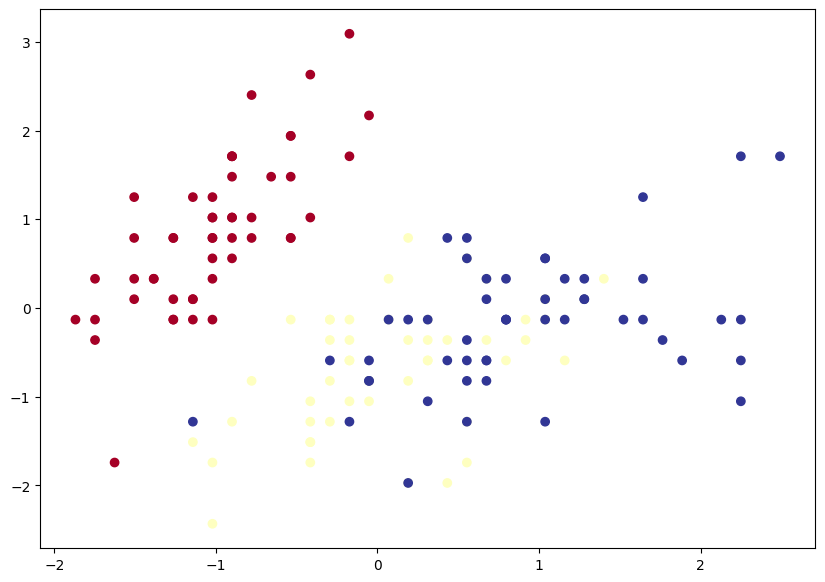

In [21]:
colors = ['r', 'g', 'b']
for class_value in np.unique(y):
    # Select points belonging to the current class
    class_points = data[classes == class_value]
    ax.scatter(class_points[:, 0], class_points[:, 1], class_points[:, 2], 
               color=colors[class_value], label=f'Class {class_value}')

# Set labels
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
ax.set_title('3D Scatter Plot of Data with Three Features and Three Classes')

# Add legend
ax.legend()

# Show the plot
plt.show()

In [ ]:
train_dataset = TensorDataset(X_train,y_train)
test_dataset = TensorDataset(X_test,y_test)


train_loader = DataLoader(train_dataset,shuffle=True,batch_size=4)
test_loader = DataLoader(test_dataset,shuffle=True,batch_size=4)

for i,(inputs,labels) in enumerate(train_loader):
    print(f"{inputs}------{labels}")
    

In [5]:
class IrisNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.network= nn.Sequential(        
        nn.Linear(4,5),
        
        nn.Linear(5,5),
        nn.Linear(5,3))
        
    def forward(self,x):
        return self.network(x)

In [6]:
def accuracy(y_true,y_pred):
    correct = torch.eq(y_true,torch.round(y_pred)).sum().item()
    acc = (correct/len(y_pred)) * 100 
    return acc


In [7]:
model = IrisNet()
loss_fcn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(),lr=0.01,momentum=0.9)


In [8]:
def accuracy(pred,target):  
        total = 0
        correct = 0    
        _,predicted = torch.max(pred.data,1)
        correct += (predicted == labels).sum().item()
        total += target.size(0)
        acc = (correct/total) * 100
        return acc

In [15]:
epochs = 100
total = 0
correct = 0

for epoch in range(epochs):
    model.train()
    running_loss  = 0.0
    
    for input , labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = loss_fcn(outputs,labels)
        
        _,predicted = torch.max(outputs.data,1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()    
        train_acc = (correct/total) * 100
        
        loss.backward()
        
        optimizer.step()
        running_loss += loss.item() * inputs.size(0)
    epoch_loss = running_loss / len(train_loader.dataset)
    print(f'Epoch [{epoch + 1}/{epochs}], | Loss: {epoch_loss:.2f}, | Accuracy:{train_acc:.2f}% ')
        

Epoch [1/100], | Loss: 1.11, | Accuracy:33.33% 
Epoch [2/100], | Loss: 1.11, | Accuracy:28.75% 
Epoch [3/100], | Loss: 1.10, | Accuracy:30.56% 
Epoch [4/100], | Loss: 1.10, | Accuracy:30.42% 
Epoch [5/100], | Loss: 1.10, | Accuracy:30.50% 
Epoch [6/100], | Loss: 1.11, | Accuracy:29.86% 
Epoch [7/100], | Loss: 1.10, | Accuracy:30.48% 
Epoch [8/100], | Loss: 1.10, | Accuracy:30.94% 
Epoch [9/100], | Loss: 1.11, | Accuracy:31.02% 
Epoch [10/100], | Loss: 1.10, | Accuracy:30.75% 
Epoch [11/100], | Loss: 1.10, | Accuracy:31.06% 
Epoch [12/100], | Loss: 1.11, | Accuracy:30.90% 
Epoch [13/100], | Loss: 1.10, | Accuracy:31.15% 
Epoch [14/100], | Loss: 1.10, | Accuracy:30.83% 
Epoch [15/100], | Loss: 1.10, | Accuracy:30.83% 
Epoch [16/100], | Loss: 1.11, | Accuracy:31.04% 
Epoch [17/100], | Loss: 1.10, | Accuracy:30.83% 
Epoch [18/100], | Loss: 1.10, | Accuracy:31.02% 
Epoch [19/100], | Loss: 1.10, | Accuracy:30.83% 
Epoch [20/100], | Loss: 1.10, | Accuracy:30.58% 
Epoch [21/100], | Loss: 1.10,

In [17]:
predicted

tensor([0, 0, 0, 0])

In [10]:
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for inputs,labels in test_loader:
        outputs = model(inputs)
        
        _,predicted = torch.max(outputs.data,1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
accuracy = 100 * correct / total
print(f"{accuracy:.2f}")
total

        

33.33


30